# HELP performance in E vs NE problem

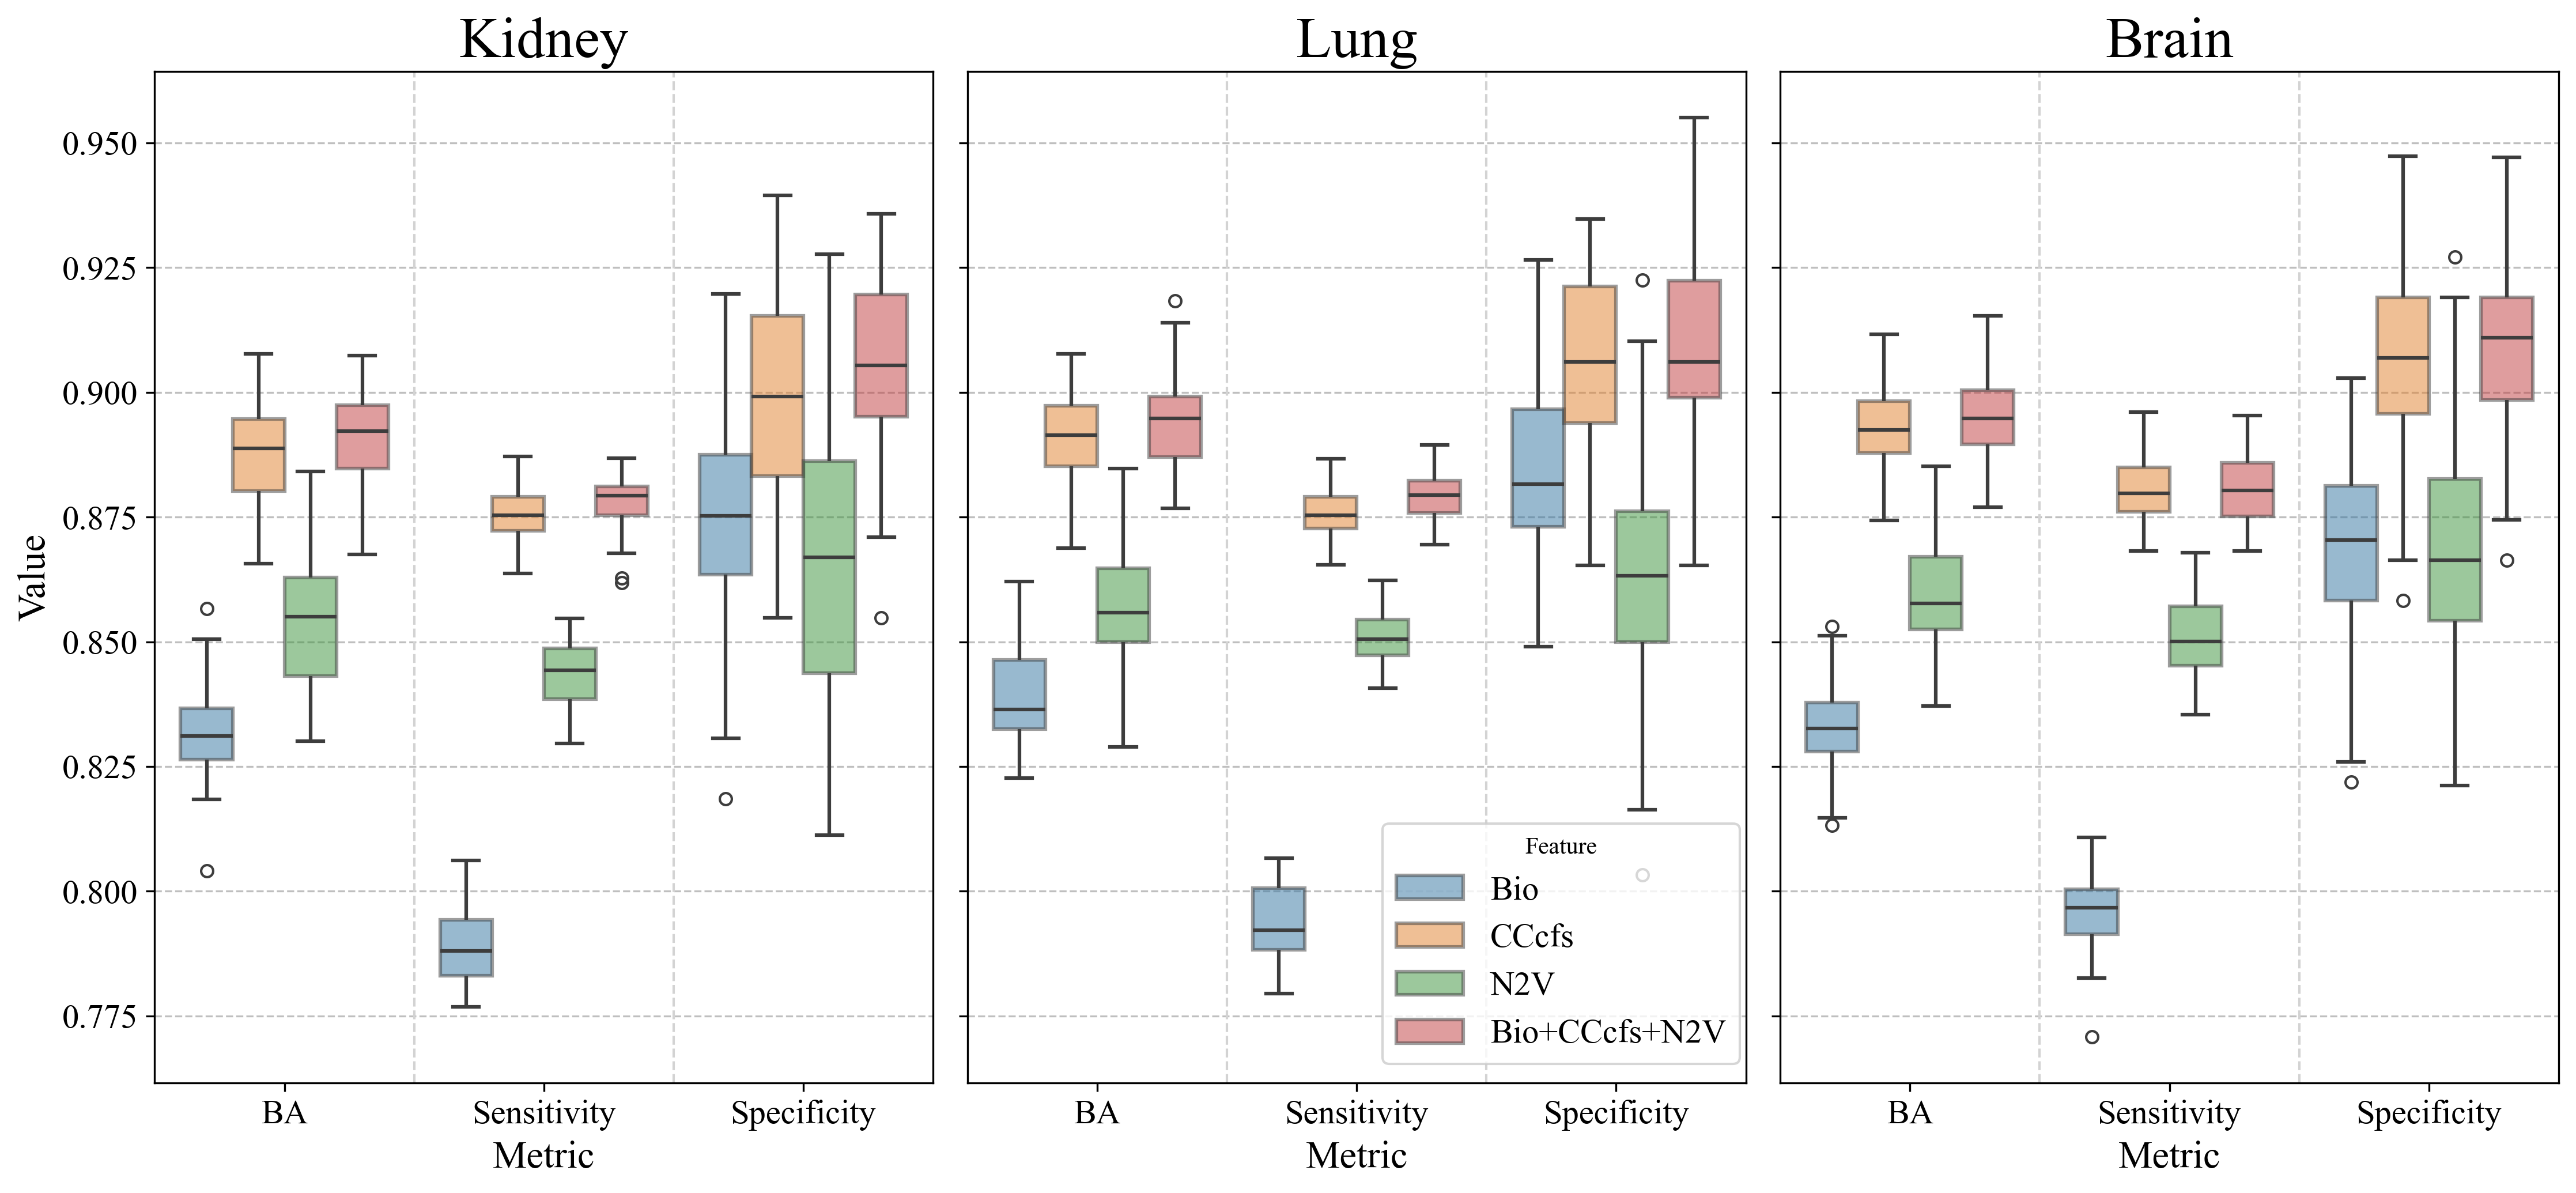

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

tissues = ['Kidney', 'Lung', 'Brain']
scorepath = '../scores'
features = ["Bio", "CCcfs", "N2V", "Bio+CCcfs+N2V"]
suffixes = ['bio', 'biocc', 'n2v', 'bioccn2v']
problem = 'EvsNE'
labels = ['(A) Kidney', '(B) Lung', '(C) Brain']
fsize = 14
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300

def generate_subplot(Scores, ax, fsize=10):
    sns.boxplot(x='Metric', y='Value', hue='Feature', data=Scores, dodge=True, linewidth=1.5, fliersize=5,
                saturation=0.75, notch=False, boxprops=dict(alpha=0.5), ax=ax)
    ax.set_xlabel("Metric", fontsize=int(fsize)+2)
    ax.set_ylabel('Value', fontsize=int(fsize)+2)
    ax.tick_params(axis='both', which='major', labelsize=fsize)
    ax.grid(axis="y", linestyle="--", alpha=0.8)
    unique_metrics = Scores["Metric"].unique()
    for i in range(1, len(unique_metrics)):
        ax.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=1)
    ax.get_legend().remove()

# Creazione di una figura con tre subplot su stessa riga
fig, axs = plt.subplots(1, len(tissues), figsize=(15, 7), sharey=True)

# Iterazione sui subplot e applicazione della funzione generate_subplot
for i, tissue in enumerate(tissues):
    dfs = []
    for feature, suffix in zip(features, suffixes):
        df_tmp = pd.read_csv(os.path.join(scorepath, f"score_HELP_{tissue}_{problem}_{suffix}.csv")).drop(columns=["ROC-AUC", "Accuracy", "MCC", "CM"])
        df_tmp['Feature'] = feature
        dfs.append(df_tmp)

    # Merge datasets and modify the dataframe for boxplot generation
    Scores = pd.concat(dfs)
    Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")
    generate_subplot(Scores, axs[i], fsize=fsize)
    axs[i].set_title(f"{tissues[i]}", y=1, fontsize=24)

# Posizionamento della legenda unica
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.53, 0.10), fontsize=fsize, title='Feature', title_fontsize='10')

# Visualizzazione della figura
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import os
import re
scorepath = '../scores'
method1 = 'HELP'
tissue = 'Lung'
problem = 'EvsNE'
precision = 3
df_p = pd.DataFrame()
df_means = pd.DataFrame()
features = ["Bio", "N2V", "CCcfs", "Bio+CC", "Bio+CCcfs+N2V"]
suffixes = ['bio', 'n2v', 'cc', 'biocc', 'bioccn2v']
cmlist = []
for feature, suffix in zip(features,suffixes):
    print(feature, suffix)
    df = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv"))
    metrics = df.drop(columns=['CM']).columns
    means, stds = df.drop(columns=['CM']).mean(), df.drop(columns=['CM']).std()
    row_df = pd.DataFrame([[f"{means[m]:.3f}±{stds[m]:.3f}" for m in metrics]], columns=metrics, index=[feature])
    row_df.index.name = 'feature'
    cma = np.zeros((4,), dtype=float)
    df['CM'] = df['CM'].apply(lambda x: np.array([int(a) for a in re.findall(r'\d+', x)]))
    for i in range(len(df)):
        cma +=  df.iloc[i]['CM'] / 10
    cma = np.reshape(cma, (2,2))
    cmlist += ["\cm{"+"{:.1f}".format(cma[0][0])+"}{"+"{:.1f}".format(cma[0][1])+"}{"+"{:.1f}".format(cma[1][0])+"}{"+"{:.1f}".format(cma[1][1])+"}{NE}{E}{"+"{:.1f}".format(cma[0][0]+cma[0][1])+"}{"+"{:.1f}".format(cma[1][0]+cma[1][1])+"}"]
    df_means = pd.concat([df_means, pd.DataFrame([[f"{means[m]:.3f}" for m in metrics]], columns=metrics)])
    df_p = pd.concat([df_p, row_df])

df_means = df_means.set_index(pd.Index(data=features, name='feature'))

print(tabulate(df_p.T, headers=features, tablefmt="latex"))
print("CM & " + " & ".join(cmlist))

Bio bio
N2V n2v
CCcfs cc
Bio+CC biocc
Bio+CCcfs+N2V bioccn2v
\begin{tabular}{llllll}
\hline
             & Bio         & N2V         & CCcfs       & Bio+CC      & Bio+CCcfs+N2V   \\
\hline
 ROC-AUC     & 0.918±0.006 & 0.931±0.008 & 0.941±0.006 & 0.957±0.005 & 0.959±0.005     \\
 Accuracy    & 0.800±0.007 & 0.852±0.005 & 0.845±0.014 & 0.878±0.005 & 0.882±0.005     \\
 BA          & 0.839±0.010 & 0.857±0.011 & 0.864±0.011 & 0.891±0.009 & 0.895±0.009     \\
 Sensitivity & 0.793±0.008 & 0.851±0.005 & 0.842±0.017 & 0.876±0.005 & 0.879±0.005     \\
 Specificity & 0.884±0.019 & 0.863±0.022 & 0.885±0.031 & 0.905±0.017 & 0.910±0.018     \\
 MCC         & 0.399±0.012 & 0.458±0.013 & 0.460±0.017 & 0.523±0.014 & 0.532±0.014     \\
\hline
\end{tabular}
CM & \cm{12701.7}{3308.3}{142.2}{1081.8}{NE}{E}{16010.0}{1224.0} & \cm{13619.7}{2390.3}{168.2}{1055.8}{NE}{E}{16010.0}{1224.0} & \cm{13486.1}{2523.9}{140.9}{1083.1}{NE}{E}{16010.0}{1224.0} & \cm{14021.9}{1988.1}{116.0}{1108.0}{NE}{E}{16010.0}{1224.0}

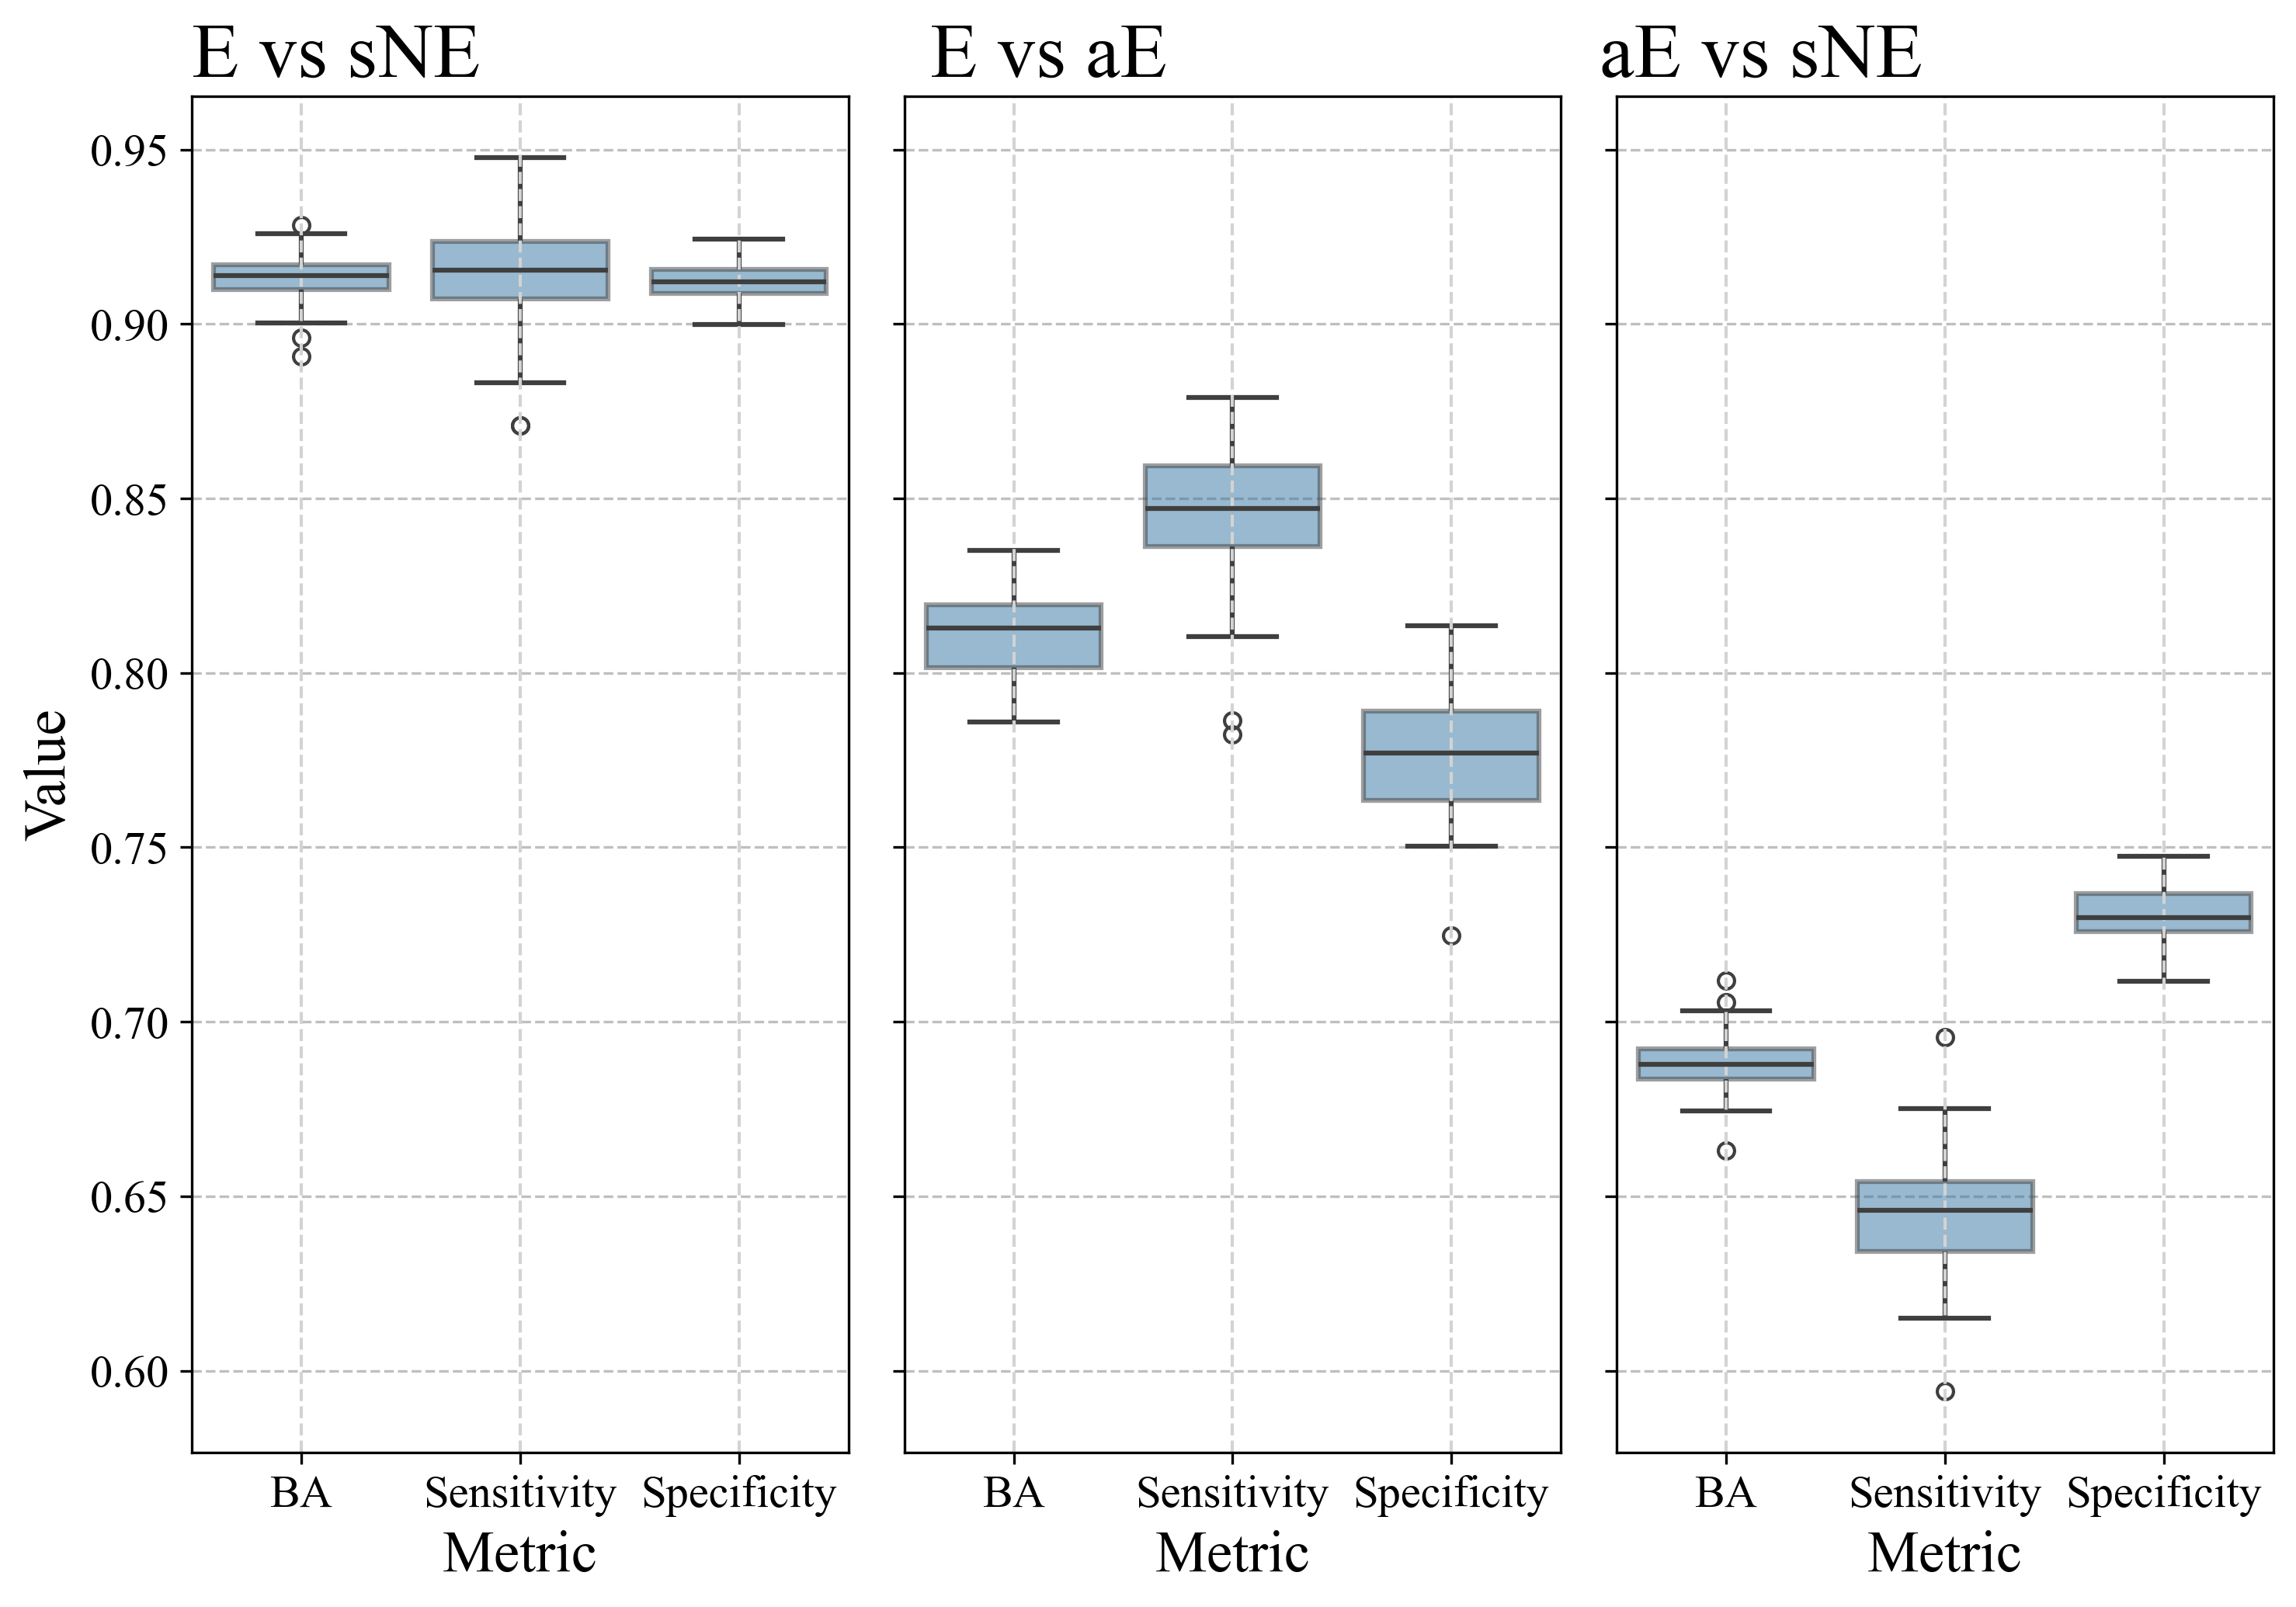

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

tissue = 'Kidney'
scorepath = '../scores'
features = ["Bio+CCcfs+N2V"]
suffixes = ['bioccn2v']
problems = ['EvsSNE', 'EvsaE', 'aEvsSNE']
labels = ['E vs sNE', 'E vs aE', 'aE vs sNE']
fsize = 14
plt.rcParams["font.family"] = "Times New Roman"
def generate_subplot(Scores, ax, fsize=10):
    sns.boxplot(x='Metric', y='Value', hue='Feature', data=Scores, dodge=True, linewidth=1.5, fliersize=5,
                saturation=0.75, notch=False, boxprops=dict(alpha=0.5), ax=ax)
    ax.set_xlabel("Metric", fontsize=int(fsize)+4)
    ax.set_ylabel('Value', fontsize=int(fsize)+4)
    ax.tick_params(axis='both', which='major', labelsize=fsize)
    ax.grid(axis="y", linestyle="--", alpha=0.8)
    unique_metrics = Scores["Metric"].unique()
    for i in range(0, len(unique_metrics)):
        ax.axvline(x=i, color='lightgray', linestyle='--', linewidth=1)
    ax.get_legend().remove()

# Creazione di una figura con tre subplot su stessa riga
fig, axs = plt.subplots(1, len(problems), figsize=(10, 7), sharey=True)

# Iterazione sui subplot e applicazione della funzione generate_subplot
for i, problem in enumerate(problems):
    dfs = []
    for feature, suffix in zip(features, suffixes):
        df_tmp = pd.read_csv(os.path.join(scorepath, f"score_HELP_{tissue}_{problem}_{suffix}.csv")).drop(columns=["ROC-AUC", "Accuracy", "MCC", "CM"])
        df_tmp['Feature'] = feature
        dfs.append(df_tmp)

    # Merge datasets and modify the dataframe for boxplot generation
    Scores = pd.concat(dfs)
    Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")
    generate_subplot(Scores, axs[i], fsize=fsize)
    axs[i].set_title(f"{labels[i]}", x=0.22, y=1.0, fontsize=24)

# Visualizzazione della figura
plt.tight_layout()
plt.show()

In [56]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import os
scorepath = '../../data4rev/scoresveryfinal'
method1 = 'HELP'
tissue = 'Kidney'
problems = ['EvsSNE', 'EvsAE', 'AEvsSNE']
precision = 3
df_p = pd.DataFrame()
df_means = pd.DataFrame()
features = ["Bio+CCcfs+N2V"]
suffixes = ['bioccn2v','bioccn2v','bioccn2v']
cmlist = []
for problem, suffix in zip(problems,suffixes):
    df = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv"))
    metrics = df.drop(columns=['CM']).columns
    means, stds = df.drop(columns=['CM']).mean(), df.drop(columns=['CM']).std()
    row_df = pd.DataFrame([[f"{means[m]:.3f}±{stds[m]:.3f}" for m in metrics]], columns=metrics, index=[problem])
    row_df.index.name = 'problem'
    cma = np.zeros((2,2), dtype=float)
    dfcm = df['CM'].replace(regex=r' ', value=r',').replace(regex=r'\[,', value='[').replace(regex=r'\n', value=',').replace(regex=r',,,', value=',').replace(regex=r',,', value=',')
    for i in range(len(df)):
        cma += np.array(eval(dfcm.iloc[i])) / 10
    row_df['CM'] = f'{cma}'
    row_df['CM'] = row_df['CM'].replace(regex=r' ', value=r',').replace(regex=r'\[,', value='[').replace(regex=r'\n', value=',').replace(regex=r',,,', value=',').replace(regex=r',,', value=',')
    cmlist += ["\cm{"+"{:.1f}".format(cma[0][0])+"}{"+"{:.1f}".format(cma[0][1])+"}{"+"{:.1f}".format(cma[1][0])+"}{"+"{:.1f}".format(cma[1][1])+"}{NE}{E}{"+"{:.1f}".format(cma[0][0]+cma[0][1])+"}{"+"{:.1f}".format(cma[1][0]+cma[1][1])+"}"]
    df_means = pd.concat([df_means, pd.DataFrame([[f"{means[m]:.3f}" for m in metrics]], columns=metrics)])
    df_p = pd.concat([df_p, row_df])

df_means = df_means.set_index(pd.Index(data=problems, name='feature'))

print(tabulate(df_p.T, headers=problems, tablefmt="latex"))
print("CM & " + " & ".join(cmlist))

\begin{tabular}{llll}
\hline
             & EvsSNE                            & EvsAE                           & AEvsSNE                           \\
\hline
 ROC-AUC     & 0.972±0.004                       & 0.894±0.009                     & 0.752±0.010                       \\
 Accuracy    & 0.912±0.005                       & 0.797±0.013                     & 0.714±0.007                       \\
 BA          & 0.913±0.007                       & 0.811±0.013                     & 0.688±0.009                       \\
 Specificity & 0.913±0.016                       & 0.846±0.022                     & 0.646±0.018                       \\
 Sensitivity & 0.912±0.006                       & 0.777±0.017                     & 0.730±0.008                       \\
 MCC         & 0.637±0.013                       & 0.574±0.024                     & 0.313±0.014                       \\
 CM          & [[1133.8,108.2],[1128.9,11757.1]] & [[1050.9,191.1],[694.1,2413.9]] & [[2006.9,1101.1],[3476.5,